### Exercise: Scrape `unegui.mn`
* Scrape apartment listings from `https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/`
* Use only the first page
  * Get the `listing title` and `listing price`
  * Make a dataframe and make a histogram using `listing price`

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup

In [2]:
# Your code here
response = requests.get("https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/")

In [5]:
soup = BeautifulSoup(response.content)

In [9]:
list_titles = soup.find_all("a", {"class":"announcement-block__title"})

In [15]:
list_titles[0]['content']

'Содон хорооллын баруун урд 56.85мкв 2 өрөө байр'

In [18]:
all_listings = soup.find_all("div", {"class": "announcement-block__price _verified"})

In [19]:
all_listings[0]

<div class="announcement-block__price _verified" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">
<meta content="Цэнгэлдэхийн урд хурд рапид хороололд 1 өрөө байр" itemprop="name"/>
<meta content="Улаанбаатар" itemprop="areaServed"/>
<meta content="MNT" itemprop="priceCurrency"/>
<meta content="120000000.00" itemprop="price"/>
            120 сая <b>₮</b>
</div>

In [21]:
all_listings[0].find("meta", {"itemprop":"name"})['content']

'Цэнгэлдэхийн урд хурд рапид хороололд 1 өрөө байр'

In [26]:
int(all_listings[0].find("meta", {"itemprop":"price"})['content'].split(".")[0])

120000000

In [28]:
data = []
for single_item in all_listings:
  title = single_item.find("meta", {"itemprop":"name"})['content']
  price = int(single_item.find("meta", {"itemprop":"price"})['content'].split(".")[0])
  data += [{"title":title, "price":price}]

In [31]:
df = pd.DataFrame(data)

<AxesSubplot:ylabel='Frequency'>

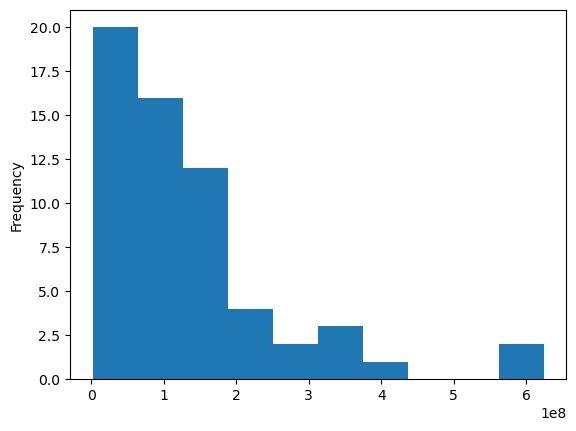

In [32]:
df['price'].plot.hist()